In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
sb.set_style("whitegrid")
%matplotlib inline

In [2]:
#load the results
results=pd.read_csv('results-final.csv')
results.describe()

,trial,train_mse,train_mae,train_r2,test_mse,test_mae,test_r2,runtime
count,14100.000000,1.410000e+04,1.410000e+04,1.410000e+04,1.410000e+04,1.410000e+04,1.410000e+04,14100.000000
mean,4.624184,1.011896e+06,7.518978e+01,-6.289030e+30,1.597111e+08,2.033270e+02,-2.585019e+30,2568.103046
std,3.036594,1.824641e+07,4.922181e+02,6.700552e+32,1.275172e+10,3.356208e+03,1.909329e+32,6192.857539
min,0.000000,7.245323e-25,6.407850e-13,-7.952000e+34,1.564375e-17,2.699808e-09,-2.008459e+34,0.020201
25%,2.000000,3.868574e-02,1.506396e-01,2.580568e-01,2.010092e-01,3.413062e-01,-4.697743e-01,0.225688
50%,5.000000,2.974804e-01,4.199382e-01,8.265430e-01,5.395816e-01,5.672374e-01,5.680875e-01,43.243815
75%,7.000000,1.083644e+00,7.665964e-01,9.756027e-01,2.598385e+00,1.265208e+00,8.342174e-01,807.846487
max,19.000000,7.276076e+08,1.274583e+04,1.000000e+00,1.384937e+12,2.983129e+05,1.000000e+00,83110.074434


In [3]:
#inspect the results
results.head()

,dataset,algorithm,trial,best_params,train_mse,train_mae,train_r2,test_mse,test_mae,test_r2,runtime
0,1027_ESL,adaboost,0.0,"[('learning_rate', 0.1), ('n_estimators', 1000)]",0.258718,0.408286,0.828302,0.392492,0.470931,0.756046,16.010458
1,1027_ESL,adaboost,1.0,"[('learning_rate', 0.1), ('n_estimators', 100)]",0.268454,0.409285,0.831809,0.379456,0.451594,0.703802,17.995114
2,1027_ESL,adaboost,2.0,"[('learning_rate', 0.01), ('n_estimators', 1000)]",0.251953,0.383733,0.841152,0.465860,0.518550,0.687073,18.231971
3,1027_ESL,adaboost,3.0,"[('learning_rate', 0.1), ('n_estimators', 1000)]",0.250562,0.422532,0.870200,0.459418,0.501843,0.725217,16.656814
4,1027_ESL,adaboost,4.0,"[('learning_rate', 0.1), ('n_estimators', 1000)]",0.264771,0.409836,0.861560,0.399912,0.476119,0.748600,18.782136


In [4]:
#as errors per each dataset might be different, we normalize train and test scores
results['holdout_score_train']=results.groupby(['dataset', 'algorithm'])['train_mse'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
results['holdout_score_test']=results.groupby(['dataset', 'algorithm'])['test_mse'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
grouped_results=pd.DataFrame()

#we check up to 3 digits of precision to consider that methods performed similarly
grouped_results=results.groupby(['dataset', 'algorithm'])[['train_mse','test_mse']].median().round(3)
grouped_results['train_ranking']=grouped_results.groupby(['dataset'])['train_mse'].apply(lambda x: x.rank().astype(int))
grouped_results['test_ranking']=grouped_results.groupby(['dataset'])['test_mse'].apply(lambda x: x.rank().astype(int))
grouped_results

train_mse   test_mse  train_ranking  \
dataset             algorithm                                                
1027_ESL            adaboost               0.262      0.396              9   
                    afp                    0.268      0.292             10   
                    eplex                  0.274      0.313             12   
                    eplex-1m               0.261      0.274              8   
                    gradboost              0.170      0.319              3   
                    gsgp                   0.209      0.314              5   
                    kernel-ridge           0.234      0.282              6   
                    lasso-lars             0.284      0.257             15   
                    linear-regression      0.271      0.296             11   
                    linear-svr             0.283      0.258             14   
                    mlp                    0.254      0.273              7   
                    mrgp                   0.119      0.910              1   
                    rf                     0.133      0.313              2   
                    sgd-regression         0.282      0.265             13   
                    xgboost                0.186      0.272              4   
1028_SWD            adaboost               0.381      0.402              9   
                    afp                    0.401      0.433             15   
                    eplex                  0.394      0.424             13   
                    eplex-1m               0.395      0.390             14   
                    gradboost              0.326      0.405              4   
                    gsgp                   0.351      0.429              5   
                    kernel-ridge           0.352      0.390              6   
                    lasso-lars             0.388      0.398             10   
                    linear-regression      0.393      0.384             12   
                    linear-svr             0.388      0.396             10   
                    mlp                    0.354      0.394              7   
                    mrgp                   0.305      0.404              1   
                    rf                     0.306      0.406              2   
                    sgd-regression         0.377      0.431              8   
                    xgboost                0.313      0.408              3   
...                                          ...        ...            ...   
706_sleuth_case1202 adaboost             840.474   4959.370              5   
                    afp                 2345.197   2901.573             11   
                    eplex               2304.743   3571.258             10   
                    eplex-1m            2106.553   3293.760              9   
                    gradboost            916.848   3419.933              6   
                    gsgp                 301.696   3308.766              2   
                    kernel-ridge        1576.878   2952.226              7   
                    lasso-lars          2679.004   2741.877             14   
                    linear-regression   2494.337   2727.702             12   
                    linear-svr          2625.062   3466.518             13   
                    mlp                 1967.075   2969.805              8   
                    mrgp                  47.354  11668.390              1   
                    rf                   457.015   3920.130              3   
                    sgd-regression      3156.568   3908.968             15   
                    xgboost              663.159   3203.817              4   
712_chscase_geyser1 adaboost              29.199     46.230              4   
                    afp                   38.326     40.250             15   
                    eplex                 35.472     40.217              7   
                    eplex-1m              35.457     38.888  

/home/patrick/.local/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


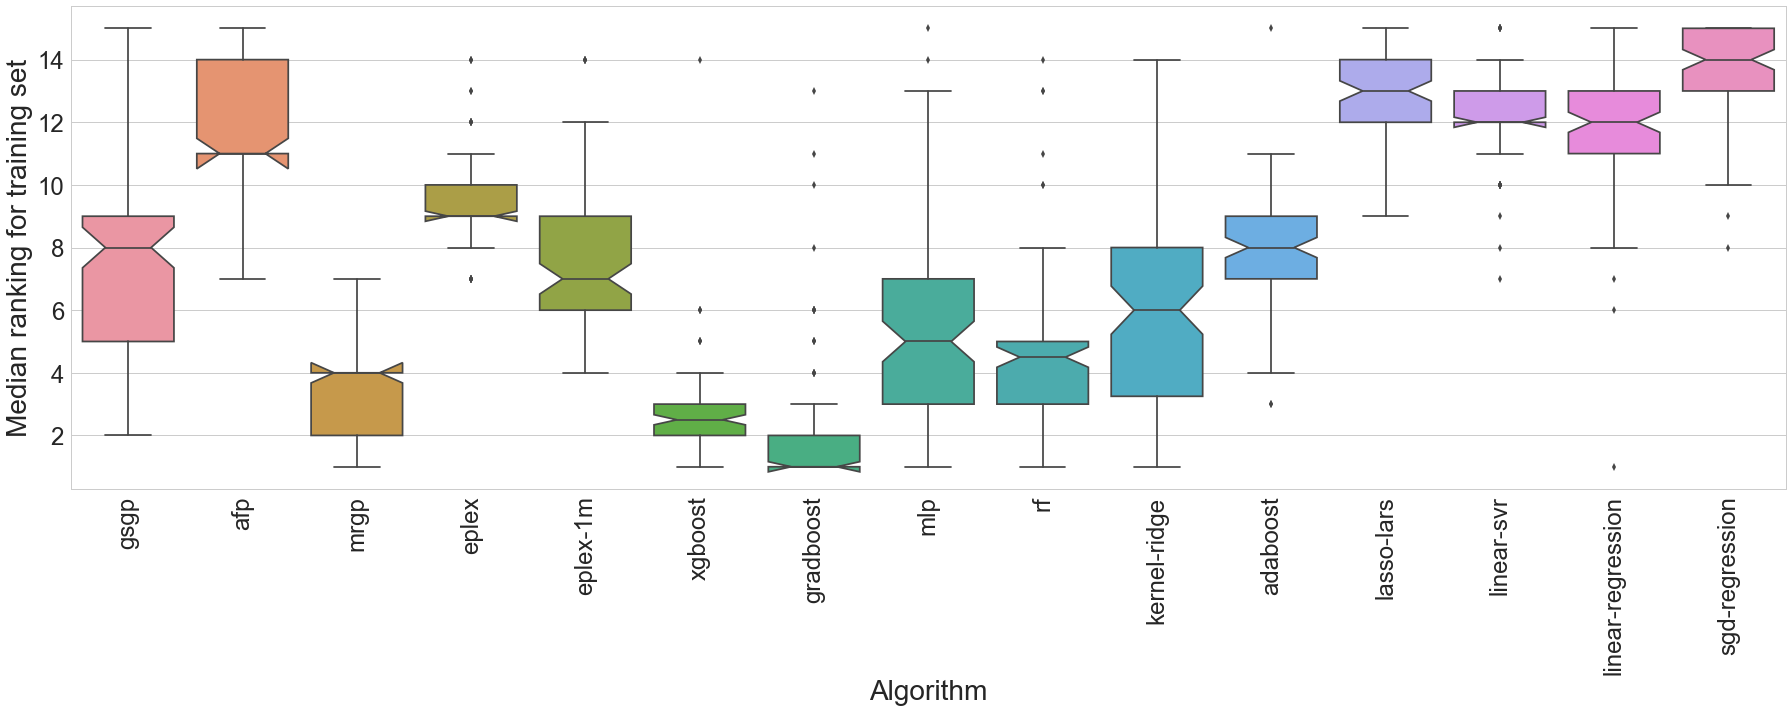

In [5]:
#we generate plot with ranking of algorithms for training data
plt.figure(figsize=(25, 10))
sb.boxplot(data=grouped_results.groupby(['dataset', 'algorithm'])['train_ranking'].median().reset_index(),
           x='algorithm', y='train_ranking', notch=True, order=['gsgp','afp','mrgp','eplex','eplex-1m','xgboost','gradboost','mlp','rf','kernel-ridge','adaboost','lasso-lars','linear-svr','linear-regression','sgd-regression'])
plt.ylabel('Median ranking for training set', fontsize=28)
plt.xlabel('Algorithm', fontsize=28)
plt.xticks(fontsize=24, rotation='vertical')
plt.yticks(fontsize=24)

plt.grid(True, axis='y') 
plt.tight_layout()

plt.savefig('training.eps')

/home/patrick/.local/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


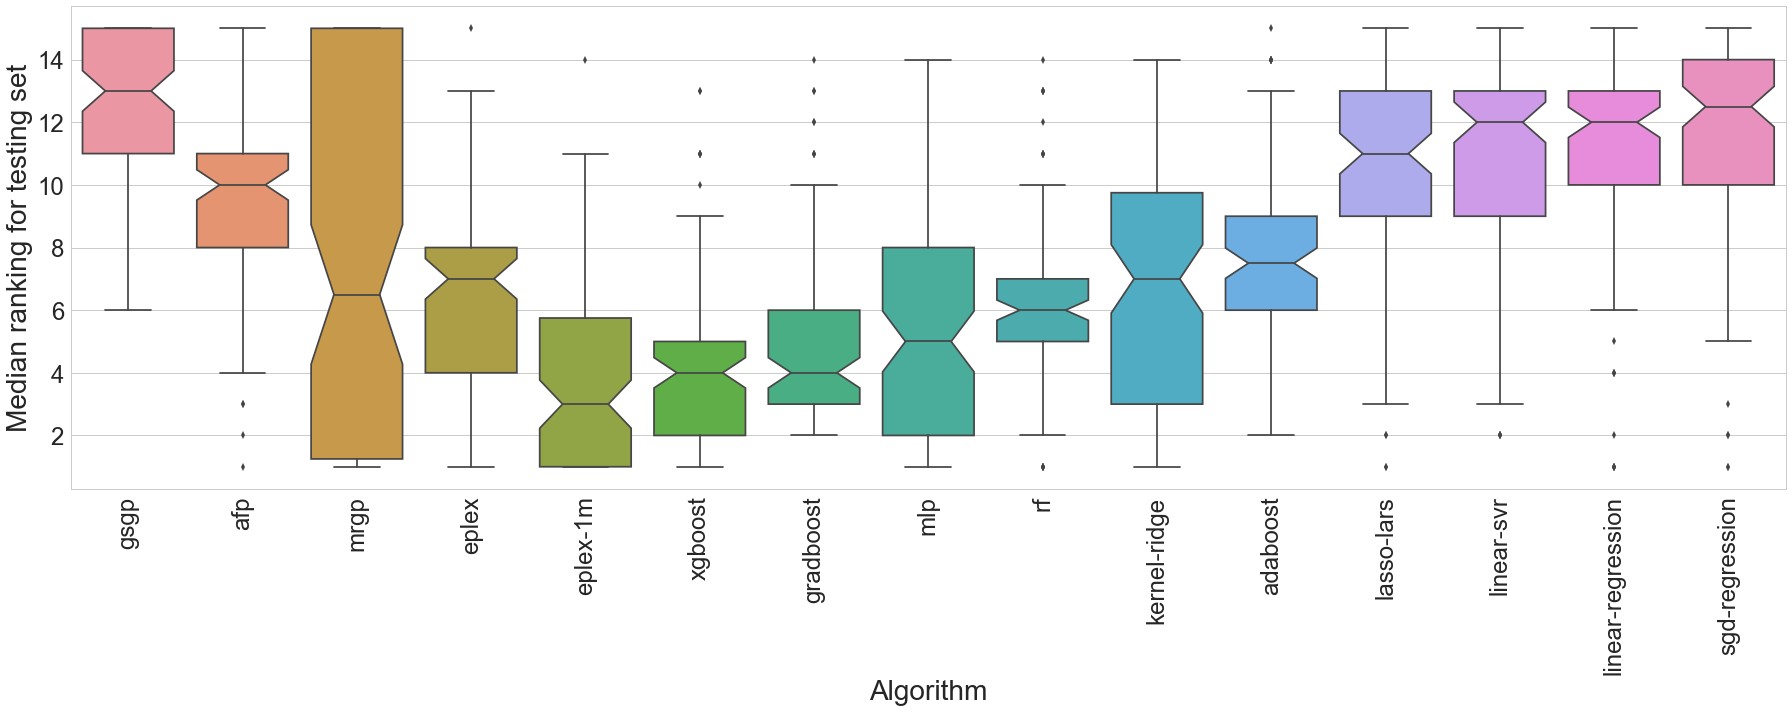

In [6]:
#we generate plot with ranking of algorithms for testing data
plt.figure(figsize=(25, 10))
sb.boxplot(data=grouped_results.groupby(['dataset', 'algorithm'])['test_ranking'].median().reset_index(),
           x='algorithm', y='test_ranking', notch=True, order=['gsgp','afp','mrgp','eplex','eplex-1m','xgboost','gradboost','mlp','rf','kernel-ridge','adaboost','lasso-lars','linear-svr','linear-regression','sgd-regression'])
plt.ylabel('Median ranking for testing set', fontsize=28)
plt.xlabel('Algorithm', fontsize=28)
plt.xticks(fontsize=24, rotation='vertical')
plt.yticks(fontsize=24)
plt.grid(True, axis='y') 
plt.tight_layout()
plt.savefig('testing.eps')

In [7]:
#calculating running time
a=(results[['dataset','algorithm','runtime']].groupby(['dataset','algorithm']).median().unstack())
a=a.stack().reset_index()
#runtime of each method needs to be divided by the number of all combinations of parameters
a.loc[a.algorithm=='eplex','runtime']=a[a.algorithm=='eplex'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='eplex-1m','runtime']=a[a.algorithm=='eplex-1m'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='afp','runtime']=a[a.algorithm=='afp'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='adaboost','runtime']=a[a.algorithm=='adaboost'][['runtime']].apply(lambda x : x/12)
a.loc[a.algorithm=='gradboost','runtime']=a[a.algorithm=='gradboost'][['runtime']].apply(lambda x : x/27)
a.loc[a.algorithm=='kernel-ridge','runtime']=a[a.algorithm=='kernel-ridge'][['runtime']].apply(lambda x : x/64)
a.loc[a.algorithm=='lasso-lars','runtime']=a[a.algorithm=='lasso-lars'][['runtime']].apply(lambda x : x/5)
a.loc[a.algorithm=='rf','runtime']=a[a.algorithm=='rf'][['runtime']].apply(lambda x : x/27)
a.loc[a.algorithm=='xgboost','runtime']=a[a.algorithm=='xgboost'][['runtime']].apply(lambda x : x/450)
a.loc[a.algorithm=='sgd-regression','runtime']=a[a.algorithm=='sgd-regression'][['runtime']].apply(lambda x : x/12)
a.loc[a.algorithm=='linear-svr','runtime']=a[a.algorithm=='linear-svr'][['runtime']].apply(lambda x : x/8)
a.loc[a.algorithm=='mrgp','runtime']=a[a.algorithm=='mrgp'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='gsgp','runtime']=a[a.algorithm=='gsgp'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='mlp','runtime']=a[a.algorithm=='mlp'][['runtime']].apply(lambda x : x/27)



/home/patrick/.local/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


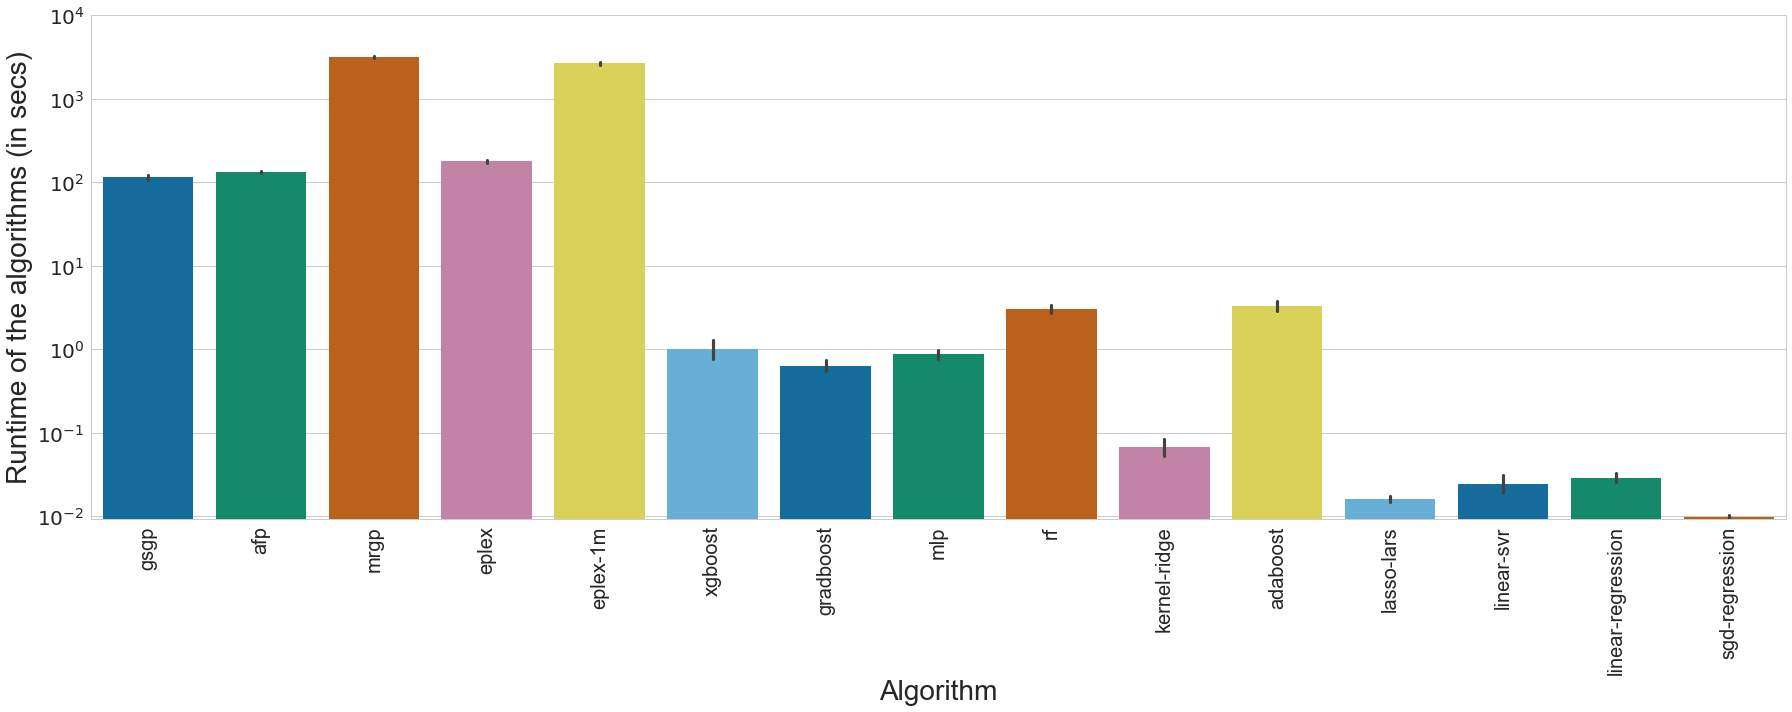

In [11]:
plt.figure(figsize=(25, 10))
g=sb.barplot(data=a,
           x='algorithm', y='runtime', order=['gsgp','afp','mrgp','eplex','eplex-1m','xgboost','gradboost','mlp','rf','kernel-ridge','adaboost','lasso-lars','linear-svr','linear-regression','sgd-regression'],
           palette='colorblind')
plt.ylabel('Runtime of the algorithms (in secs)', fontsize=28)
plt.xlabel('Algorithm', fontsize=28)
plt.xticks(fontsize=20, rotation='vertical')
plt.yticks(fontsize=20)
plt.grid(True, axis='y') 
plt.gca().set_yscale('log')
plt.ylim(0,10000)
plt.tight_layout()
plt.savefig('runtime.eps')

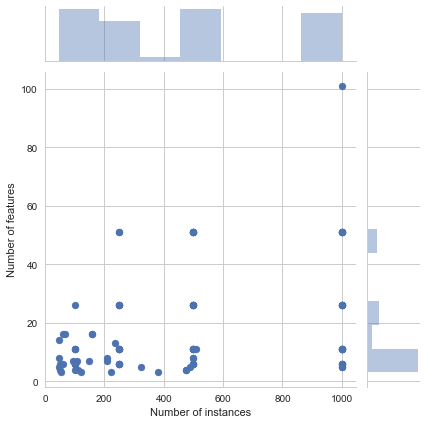

In [10]:
df=pd.read_csv('Regression_datasets_pmlb.tsv', sep='\t')
g=sb.jointplot(x='NumberOfInstances',y='NumberOfFeatures', data=df,stat_func=None)
ax = g.ax_joint
ax.set_xlabel('Number of instances')
ax.set_ylabel('Number of features')
plt.savefig('databases.eps')